In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import altair as alt
import seaborn as sns

In [11]:
np.arange(-3, 3, 0.5)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5])

In [21]:
np.e ** np.arange(0,9)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

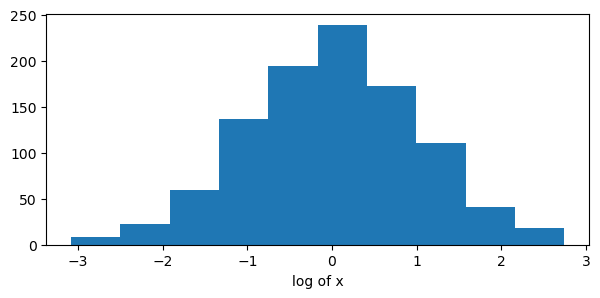

In [24]:
plt.figure(figsize=(7,3))

data = np.random.randn(1000, 1)
plt.hist(data)
# plt.xlim(-1,1)
# plt.xticks(np.e ** np.arange(0,9))

plt.xlabel('log of x')
plt.show()

In [4]:
groups = {
    'cat': ['nala_cat','realgrumpycat','smoothiethecat','catconworldwide','maple.cat','catinberlin','catladybox','triumphant_teagan','aliencatmatilda','mollymollzthetabby','my_lulu_cat_','my_furry_babies','monicasisson','allcreaturestv','moana.and.snapple','thatcatconrad','catsvscancer','baili_the_cat','panther.cat','rajathebengal','butter_the_siberian','trippy.tails','bearbear.cat','mochicat168','bellina_kitty_cat','rainerogers','ambrosepets','realbadgalrhirhi','pawaiihub','denbo_nish','siberian.milo'],
    'cook': ['halfbakedharvest','ketosnackz','nourishing','smittenkitchen','olivia.adriance','chloecleroux','geoffreyzakarian','177milkstreet','winnyhayes','alyssacoadynutrition','liveeatlearn','thefoodnanny','femalefoodie','sherryhour','allinspiredwellness','mytoddlerskitchen','simplicityandastarter','reciperunner','jamleenbears','lydialove98','mleroehler','anniesfinds_','carnivore_connoisseur_','littlespoonfarmblog','perfectsupplements','feelgoodwithfi','yourstrulyani','thismomentinthyme','leahmariestack','through.manals.lens','recipesfrommichelle','mccauley_tawpash','mintandclove','ashleighbovard','neeleman_food_'],
    # using lda
    'brands' : ['nike', 'adidas', 'starbucks', 'apple', 'samsung', 'netflix', 'amazon', 'google', 'microsoft', 'tesla', 'cocacola', 'pepsi', 'redbull', 'louisvuitton', 'gucci', 'chanel', 'prada', 'zara', 'hugo', 'hm', 'ikea', 'lego', 'target', 'walmart', 'mcdonalds', 'burgerking', 'kfc', 'dominos', 'airbnb', 'uber', 'spotify', 'youtube', 'facebook', 'instagram', 'twitter', 'pinterest', 'tiktok', 'snapchat', 'linkedin', 'sony', 'playstation', 'xbox', 'nintendo', 'disney', 'marvel', 'pixar', 'warnerbros', 'hbo', 'hulu', 'espn', 'nba', 'nfl', 'fifa', 'nikefootball', 'adidasfootball', 'puma', 'underarmour', 'reebok', 'converse', 'vans', 'forever21', 'victoriassecret', 'calvinklein', 'tommyhilfiger', 'ralphlauren', 'burberry', 'dior', 'versace', 'balenciaga', 'givenchy', 'fendi', 'hermes', 'cartier', 'tiffanyandco', 'rayban', 'oakley', 'gopro', 'canon', 'nikon', 'sonymusic', 'universalmusic', 'warnerrecords', 'atlanticrecords', 'rollingstone', 'vogue', 'elle', 'harpersbazaar', 'cosmopolitan'],
    # using deepseek
    'celebrities' : ['cristiano', 'leomessi', 'selenagomez', 'therock', 'kyliejenner', 'arianagrande', 'kimkardashian', 'beyonce', 'khloekardashian', 'justinbieber', 'kendalljenner', 'taylorswift', 'jlo', 'nickiminaj', 'kourtneykardash', 'mileycyrus', 'katyperry', 'zendaya', 'kevinhart4real', 'kingjames', 'ddlovato', 'badgalriri', 'champagnepapi', 'ellendegeneres', 'k.mbappe', 'billieeilish', 'lalalalisa_m', 'vindiesel', 'shraddhakapoor', 'priyankachopra', 'narendramodi', 'shakira', 'snoopdogg', 'davidbeckham', 'dualipa', 'jennierubyjane', 'aliaabhatt'],
    # using chatgpt
    'democrats' : ['joebiden', 'kamalaharris', 'barackobama', 'michelleobama', 'berniesanders', 'aoc', 'chuckSchumer', 'elizabethwarren', 'amyklobuchar', 'corybooker', 'chrismurphyct', 'repjerrynadler', 'repkatieporter', 'repvaldemings', 'repdebhaaland', 'repmarkpocan', 'repjimmygomez', 'repdavidcicilline', 'repdonbeyer', 'repderekkilmer', 'repsusielee', 'repkathleenrice', 'repjimhimes', 'repgregstanton', 'repjuanvargas', 'repmikethompson', 'repjimlangevin', 'repjimcosta', 'repjimmygomez', 'repjoshharder', 'repkatiehill'],
    'republicans' : ['mikepence', 'realdonaldtrump', 'potus', 'lindseygrahamsc', 'tedcruz', 'mittromney', 'pauldavisryan', 'ronjohnsonwi', 'marcorubio', 'newtgingrich', 'speakermccarthy', 'johncornyn', 'rondesantis', 'kristinoem', 'stevescalise', 'markmeadows', 'tx', 'elisestefanik', 'leezeldin', 'cathymcmorris', 'replizcheney', 'repmattgaetz', 'repbrianmast', 'repgregpence', 'repmarkgreen', 'repbuddycarter', 'repjeffduncan', 'repdavidkustoff', 'reppatfallon', 'repchrisstewart', 'repkenbuck'],
    # using deepseek

    'news': ['wsj', 'financialtimes', 'msnbc', 'cspan', 'theintercept', 'aljazeera', 'foxnews', 'guardian', 'time', 'nytimes', 'newsweek', 'bbcnews', 'bloomberg', 'nypost', 'businessinsider', 'cnn', 'forbes,politico', 'huffpost', 'abcnews', 'nbcnews', 'axios', 'thehill', 'cbsnews', 'usatoday', 'washingtonpost', 'vice', 'latimes', 'reuters', 'thedailybeast', 'npr', 'apnews'],

    'gun' : ['garand_thumb','gunpolicy','gunownersofamerica','sb.tactical','lawtactical','midwestindustries','centuryarms','gundrummer','griffin_armament','down_range_photography','maximdefense','zaffiri.precision','pewpewtactical','killerinnovations','rarebreedfirearms','battleborn','xtechtactical','gregskazphotography','kci_usa','firearmchronicles','patriot_defense_gear','704_tactical','armedscholaryt','shootersgrill','elevatedsilence','sdgunowners','womenforgunrights','gunownersca','2arally','rmgo_official'],
    # using lda

    'healthright' : ['thetruthaboutcancerttac','elaineshtein','drmercola','joshsfarmersmarket','dr.goodyear','crunchykass','raw_farm_usa','farmmatch','theregenaissance','momsacrossamerica','freedom.hill.farm','ilanamuhlsteinrd','jessalyn.randle','bobolinkdairyandbakehouse'],
    # using sbert

    'healthleft' : ['peoplescdc','clean.air.club','youlookokaytome','topheravila','thesicktimes','longcovidjustice','thaibrows','berlin_buyers_club','la.spoonie.collective','thecovidcollection','long_hauler_haven','maskednh','jaydocovid','maskblocseattle','cleartheair.atx','transgressivemedicine','itsjiyounkim'],

    # using sbert
    'queer' : ['them','themilesmckenna','queer_lective','dylanmulvaney','themme_fatale','chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset','genderlib','jake_graf5','raindovemodel','plussizetransguy','trans.ginger','trevorproject','chandlernwilson','blacktranstravelfund','mpjinstitute','gabesdunn'],

    'palestine' : ['jd.moha','mikopeled','wizard_bisan1','jewishvoiceforpeace','plestia.alaqad','belalkh','zein_rahma','eid_yara','lama_jamous9','jenanmatari','dr.ghassan.as','nooh.xp','savesilwan','amirgharabawi','saher_alghorra','haneen.maher.salem','palmuseum','yplusmedia','palestinianyouthmovement','right2edu','sjp.uo','uospalsoc','bigbigbigthings','jaxpsn','alaa_fayez.12','wizard_bisan2','bayanpalestine','mohammadhureini','hind.touissate','palestinehouseoffreedom','taniasafi','nadiforpalestine','queersinpalestine','apc_uk_london','shirien.creates','operationolivebranch'],
    'zionist' : ['betarworldwide','israelcc','standwithus','jewishwomen4allwomen','adielofisrael','ajc.global', 'strength4israel','_danielbraun','montanatucker','proudzionista','antisemitism','j.majburd','israel365action','bringhomenow','bring.amiram.home.now','aipac','kidnappedfromisrael','dahliakurtz','cameraoncampus','mactaskforce','elizabethyounger','lanianpo','henmazzig','freejamshidsharmahd','natashahausdorff','worldjewishcongress','allhostages','bringbackourhearts','thepersianjewess','michahdoot','leetrink','themodernmaccabee','ajewishresistance','zicksworld','abbasez'], # 'susancollinsla' not just israel

    'tradwife' : ['ourquaintandcozy','call_mejewels','hannahlee.yoder','simplyalliehomestead','ballerinafarm','esteecwilliams','zimcolorado','classicallyabby','naraaziza','lifewithmrsp', '_cynthialoewenseguin']
    # using sbert
}
groupmap = {v: k for k, vs in groups.items() for v in vs}
group_titles = {
    'cat': 'Cat',
    'cook': 'Cooking',
    'brands': 'Brands',
    'celebrities': 'Celebrities',
    'democrats': 'Democrats',
    'republicans': 'Republicans',
    'news': 'News',
    'gun': 'Gun',
    'healthright': 'Health Right',
    'healthleft': 'Health Left',
    'queer': 'LGBTQ',
    'palestine':'Pro-Palestine',
    'zionist': 'Zionist',
    'tradwife': 'Tradwives'
}
group_order = ['cat', 'cook', 'brands', 'celebrities', 'news','democrats', 'republicans', 'healthright', 'healthleft','gun', 'queer', 'tradwife','palestine', 'zionist']

finished_usernames = "thismomentinthyme,shraddhakapoor,trans.ginger,recipesfrommichelle,zaffiri.precision,reppatfallon,repdonbeyer,baili_the_cat,businessinsider,shootersgrill,trippy.tails,ambrosepets,classicallyabby,chellaman,ballerinafarm,patriot_defense_gear,mattxiv,bobolinkdairyandbakehouse,lindseygrahamsc,moana.and.snapple,instagram,mittromney,yplusmedia,arianagrande,_danielbraun,hind.touissate,plussizetransguy,selenagomez,through.manals.lens,repkenbuck,allinspiredwellness,jewishvoiceforpeace,taylorswift,pawaiihub,cspan,jaxpsn,repjerrynadler,mytoddlerskitchen,rarebreedfirearms,berniesanders,nooh.xp,xtechtactical,kevinhart4real,kamalaharris,repjuanvargas,catsvscancer,shakira,disney,themilesmckenna,taniasafi,repmarkpocan,itsjiyounkim,apc_uk_london,bigbigbigthings,rondesantis,target,reciperunner,chandlernwilson,palmuseum,repjimcosta,bayanpalestine,underarmour,nala_cat,bearbear.cat,repkathleenrice,liveeatlearn,barackobama,repjimhimes,aoc,repdebhaaland,cristiano,mcdonalds,lalalalisa_m,rmgo_official,smoothiethecat,tanyacompas,zendaya,louisvuitton,kimkardashian,calvinklein,victoriassecret,speakermccarthy,gabesdunn,queer_lective,montanatucker,down_range_photography,davidbeckham,belalkh,sdgunowners,repdavidkustoff,chrismurphyct,adidasfootball,winnyhayes,johncornyn,panther.cat,longcovidjustice,geoffreyzakarian,triumphant_teagan,blacktranstravelfund,ajewishresistance,nourishing,feelgoodwithfi,thetruthaboutcancerttac,israelcc,cartier,haneen.maher.salem,kourtneykardash,trevorproject,repbuddycarter,aliaabhatt,alaa_fayez.12,proudzionista,repjimlangevin,tedcruz,khloekardashian,transgressivemedicine,drmercola,pauldavisryan,michahdoot,repdavidcicilline,adielofisrael,freejamshidsharmahd,repkatieporter,sonymusic,repsusielee,leahmariestack,jake_graf5,microsoft,amirgharabawi,halfbakedharvest,billieeilish,femalefoodie,jlo,la.spoonie.collective,shirien.creates,mikepence,leezeldin,freedom.hill.farm,mpjinstitute,reuters,justinbieber,repbrianmast,lawtactical,704_tactical,ketosnackz,jessicaoutofthecloset,marcorubio,mccauley_tawpash,jennierubyjane,youlookokaytome,beyonce,gunownersofamerica,killerinnovations,elizabethyounger,right2edu,sadegiliberti,mleroehler,mintandclove,jd.moha,thaibrows,kyliejenner,them,esteecwilliams,starbucks,bloomberg,butter_the_siberian,my_furry_babies,pewpewtactical,farmmatch,alyssacoadynutrition,joebiden,repmarkgreen,priyankachopra,elevatedsilence,lydialove98,chloecleroux,amazon,thatcatconrad,narendramodi,hulu,aipac,kendalljenner,repgregpence,catconworldwide,badgalriri,uospalsoc,mikopeled,kristinoem,dylanmulvaney,dahliakurtz,champagnepapi,warnerrecords,repvaldemings,naraaziza,replizcheney,bellina_kitty_cat,repjoshharder,repchrisstewart,tommyhilfiger,neeleman_food_,aliencatmatilda,joshsfarmersmarket,raw_farm_usa,mohammadhureini,corybooker,plestia.alaqad,denbo_nish,wizard_bisan1,gundrummer,nickiminaj,kingjames,savesilwan,sb.tactical,ellendegeneres,antisemitism,gunownersca,topheravila,peoplescdc,rainerogers,repjimmygomez,abbasez,firearmchronicles,repkatiehill,mollymollzthetabby,anniesfinds_,lanianpo,zein_rahma,jessalyn.randle,call_mejewels,allcreaturestv,monicasisson,google,themme_fatale,maple.cat,perfectsupplements,kci_usa,nikefootball,mactaskforce,mochicat168,armedscholaryt,elaineshtein,kfc,chuckSchumer,leetrink,canon,catinberlin,battleborn,thefoodnanny,ourquaintandcozy,michelleobama,womenforgunrights,littlespoonfarmblog,zicksworld,olivia.adriance,leomessi,sherryhour,newtgingrich,elisestefanik,my_lulu_cat_,realgrumpycat,henmazzig,griffin_armament,_cynthialoewenseguin,repderekkilmer,centuryarms,lifewithmrsp,2arally,dr.goodyear,prada,eid_yara,ilanamuhlsteinrd,dominos,repjeffduncan,maximdefense,stevescalise,ashleighbovard,garand_thumb,k.mbappe,siberian.milo,nikon,cameraoncampus,realbadgalrhirhi,markmeadows,ronjohnsonwi,vice,raindovemodel,momsacrossamerica,repmattgaetz,repgregstanton,xbox,vindiesel,repmikethompson,katyperry,cathymcmorris,apple,therock,cosmopolitan,themodernmaccabee,pixar,ddlovato,worldjewishcongress,elizabethwarren,gopro,saher_alghorra,gunpolicy,catladybox,gregskazphotography,mileycyrus,midwestindustries,spotify,realdonaldtrump,yourstrulyani,amyklobuchar".split(",")

In [ ]:
with open('df_bypost_simple.pkl', 'rb') as f:
    # df_bypost = pickle.load(f)
    df_bypost = pd.read_pickle(f)

df_bypost = df_bypost[df_bypost['username'].isin(finished_usernames)].query('caption != "earliest date reached"')

df_bypost['log_likes'] = np.log(df_bypost['likes'] + 1)

c:\Users\grace\anaconda3\envs\nlp\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# preliminary dataset

In [107]:
parents = ['foxnews','cnn','bbcnews', 'nytimes','washingtonpost','ajplus',\
'nala_cat','cobythecat','realgrumpycat','iamlilbub','smoothiethecat','sisterminnie.mb',\
'ballerinafarm','esteecwilliams','zimcolorado','classicallyabby',\
'chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset',\
'nationalgunrights','gunownersofamerica','everyday_tactical','fourguysguns','readygunner',\
'jewishvoiceforpeace', 'jd.moha','mikopeled','wizard_bisan1',\
'cdcgov','nihgov', 'who',\
'maskednh','crutches_and_spice','clean_air_club',\
'crunchykass','drmercola','joshsfarmersmarket','raw_farm_usa'] # used raw milk because covid not a big talking point for them now, hard to find active accounts on this

df_parents = df.query('username in @parents').reset_index().drop_duplicates()

In [154]:
df = pd.read_csv("../collection/data/all_children1_follow_count.csv",index_col=0).query("num_followers > 0").query("num_posts > 0")
df['num_followers_log'] = np.log(df['num_followers'])
df['num_posts_log'] = np.log(df['num_posts'])
df.reset_index(drop=True)
df.head()

,num_followers,num_posts,num_followers_log,num_posts_log
username,,,,
weheartbreadandbutter,24965,3599,10.125230,8.188411
kutlaydede,943,639,6.849066,6.459904
thethobeproject,11016,150,9.307104,5.010635
ummkulthummusical,3326,254,8.109526,5.537334
boltranchstore,17367,194,9.762327,5.267858


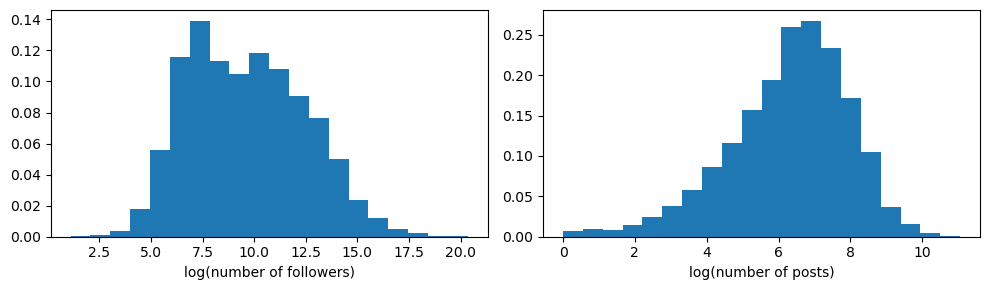

In [105]:
# make a histogram of the number of followers
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.hist(df['num_followers_log'], bins=20, density=True)
plt.xlabel("log(number of followers)")

plt.subplot(1, 2, 2)
plt.hist(df['num_posts_log'], bins=20, density=True)
plt.xlabel("log(number of posts)")

plt.tight_layout()
plt.savefig("./figs/follow_post_count.png")

In [ ]:
parents = ['foxnews','cnn','bbcnews', 'nytimes','washingtonpost','ajplus',\
'nala_cat','cobythecat','realgrumpycat','iamlilbub','smoothiethecat','sisterminnie.mb',\
'ballerinafarm','esteecwilliams','zimcolorado','classicallyabby',\
'chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset',\
'nationalgunrights','gunownersofamerica','everyday_tactical','fourguysguns','readygunner',\
'jewishvoiceforpeace', 'jd.moha','mikopeled','wizard_bisan1',\
'cdcgov','nihgov', 'who',\
'maskednh','crutches_and_spice','clean_air_club',\
'crunchykass','drmercola','joshsfarmersmarket','raw_farm_usa']

C:\Users\grace\AppData\Local\Temp\ipykernel_31608\2605211018.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


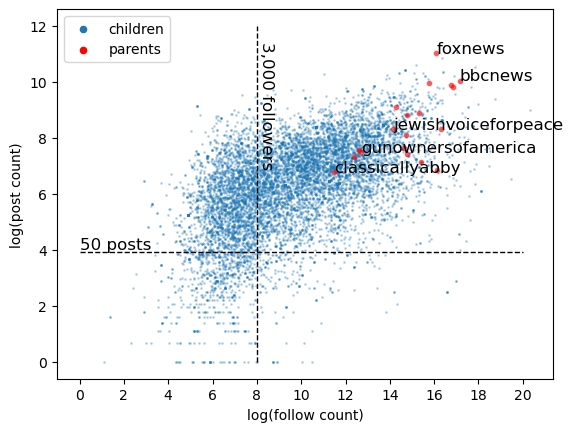

In [205]:
usernames = ['foxnews','bbcnews','jewishvoiceforpeace','classicallyabby','raw_farm_usa','gunownersofamerica']

plt.scatter(df['num_followers_log'],df['num_posts_log'], alpha = 0.25, s=1, label = 'children', zorder = 2)
plt.scatter(df_parents['num_followers_log'],df_parents['num_posts_log'], s = 10, c = 'red', alpha = 0.5, label = 'parents', zorder = 3)

for i, row in df_parents.query('username in @usernames').iterrows():
    plt.annotate(row['username'], (row['num_followers_log'], row['num_posts_log']), fontsize=12)

plt.vlines(np.log(3000), 0, 12, color='black', linestyle='--', lw = 1, zorder = 3)
plt.annotate('3,000 followers', (np.log(3000) + 0.1, 7), fontsize=12, color='black', rotation = -90)
plt.hlines(np.log(50), 0, 20, color='black', linestyle='--', lw = 1, zorder = 3)
plt.annotate('50 posts', (0, np.log(50) + 0.1), fontsize=12, color='black')

plt.xlabel('log(follow count)')
plt.ylabel('log(post count)')
plt.xticks(np.arange(0,21,2))

leg = plt.legend()    
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([20])
plt.setp(leg.get_texts(), color='black')

# in crease dpi
plt.savefig('figs/scatter_follow_post_count.png', dpi = 800)

In [ ]:
with open("../collection/data/filter/df_posts12_list.pkl", "rb") as f:
    df_list = pickle.load(f)

caption_lengths = []
for _ in df_list:
    _['caption'].fillna("", inplace=True)
    _['caption_len'] = _['caption'].str.split().apply(len)
    # df['log_caption_len'] = np.log(df['caption_len'])
    caption_lengths.extend(_['caption_len'].tolist())
df_caption = pd.concat(df_list)

C:\Users\grace\AppData\Local\Temp\ipykernel_31608\912414303.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['caption'].fillna("", inplace=True)
C:\Users\grace\AppData\Local\Temp\ipykernel_31608\912414303.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['caption'].fillna("", inplace=True)
C:\Users\grace\AppData\Local\Temp\ipykernel_31608\912414303.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['caption'].fillna("", inplace=True)
C:\Users\grace\AppData\Local\Temp\ipykernel_31608\91

In [185]:
df_caption.query('caption.str.contains("Tomorrow, April 1st mark")')['caption'][1]

'Tomorrow, April 1st marks my tenth anniversary as a staff photojournalist at The Washington Post. Technically I started as a contract photographer at the end of 2010, but was hired on staff in 2013. Here is a random selection of photos from over the years. (Photos by @mattmcclainphoto /The Washington Post)      1. Zach Cardwell, right, watches the Flying Heels Rodeo as a rainbow streaks across the sky as a storm passes through on Saturday July 03, 2021 in Granby, CO.     2. Workers adjust flags before a Hillary Clinton election night event at the Javits Center on Tuesday November 8, 2016 in New York City, New York.     3. People are reflected in mirrors along a staircase at a business on Venice Beach on Monday August 16, 2021 in Venice, CA.     4. Erin Herrgott, 20, of Oxford, MI, center, is talked to by instructor, Howard Parsons after arriving with other new trainees at the United States Border Patrol Academy on Wednesday August 29, 2018 in Artesia, NM.      5. Christian Jacobs, 7, 

C:\Users\grace\AppData\Local\Temp\ipykernel_31608\3301961660.py:21: UserWarning: Glyph 127859 (\N{COOKING}) missing from current font.
  plt.tight_layout()
C:\Users\grace\AppData\Local\Temp\ipykernel_31608\3301961660.py:22: UserWarning: Glyph 127859 (\N{COOKING}) missing from current font.
  plt.savefig("./figs/caption_length.png", dpi = 800)
c:\Users\grace\anaconda3\envs\basic_analysis\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127859 (\N{COOKING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


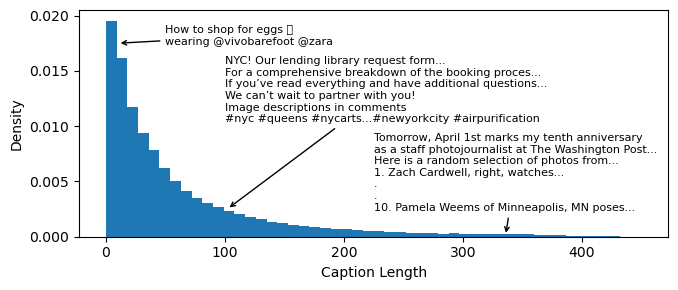

In [269]:
plt.figure(figsize=(7, 3))
plt.hist(caption_lengths, bins=50, density=True)

short = 'How to shop for eggs 🍳\nwearing @vivobarefoot @zara'
# dariasavaya
medium = 'NYC! Our lending library request form...\nFor a comprehensive breakdown of the booking proces...\nIf you’ve read everything and have additional questions...\nWe can’t wait to partner with you!\nImage descriptions in comments\n#nyc #queens #nycarts...#newyorkcity #airpurification'
# a.i.r.nyc
long = 'Tomorrow, April 1st marks my tenth anniversary\nas a staff photojournalist at The Washington Post...\nHere is a random selection of photos from...\n1. Zach Cardwell, right, watches...\n.\n.\n10. Pamela Weems of Minneapolis, MN poses...'

# instead of using plt.text, use plt.annotate with arrows
plt.annotate(short, xy=(10, 0.0175), xytext=(50, 0.0175),
             arrowprops=dict(facecolor='black', lw = 1, arrowstyle = "->"), fontsize=8, wrap = True)
plt.annotate(medium, xy=(102, 0.0025), xytext=(100, 0.0105),
                arrowprops=dict(facecolor='black', lw = 1,arrowstyle = "->"), fontsize=8, wrap = True)
plt.annotate(long, xy=(336, 0.0001), xytext=(225, 0.0025),
                arrowprops=dict(facecolor='black', lw = 1,arrowstyle = "->"), fontsize=8, wrap = True)

plt.xlabel("Caption Length")
plt.ylabel("Density")

plt.tight_layout()
plt.savefig("./figs/caption_length.png", dpi = 800)

# count account, post, likes

In [51]:
df_bypost.query('log_likes >= 0')['likes'].mean(), df_bypost.query('log_likes >= 0')['likes'].median()

(174481.7732150189, 3204.0)

In [50]:
df_bypost.query('log_likes >= 0')['log_likes'].mean(), df_bypost.query('log_likes >= 0')['log_likes'].median()

(8.25128066969892, 8.07246736935477)

In [35]:
count_df = df_bypost.query('likes > 0').groupby(['username','group']).count().groupby('group').agg({'comments':'count','likes':'sum'}).rename(columns={'likes':'Posts','comments':'Accounts'}).loc[group_order].reset_index()
count_df['Group'] = count_df['group'].map(group_titles)
count_df['Accounts'] = count_df['Accounts'].apply(lambda x: "{:,}".format(x))
count_df['Attempted Accounts'] = count_df['group'].apply(lambda x: len(groups[x]))

In [36]:
latex_code = count_df[['Group','Attempted Accounts','Accounts','Posts']].to_latex(
    caption = "Number of accounts and posts per group",
    label = "tab:count_df",
    position = "!htbp",
    column_format = "lrr",
    index = False,
)

print(latex_code)

\begin{table}[!htbp]
\caption{Number of accounts and posts per group}
\label{tab:count_df}
\begin{tabular}{lrr}
\toprule
Group & Attempted Accounts & Accounts & Posts \\
\midrule
Cat & 31 & 30 & 7422 \\
Cooking & 35 & 30 & 10264 \\
Brands & 88 & 30 & 31802 \\
Celebrities & 37 & 35 & 11405 \\
Democrats & 31 & 30 & 13603 \\
Republicans & 31 & 29 & 13222 \\
News & 31 & 5 & 5845 \\
Gun & 30 & 30 & 17260 \\
Health Right & 14 & 12 & 6571 \\
Health Left & 17 & 8 & 694 \\
LGBTQ & 20 & 19 & 9400 \\
Tradwives & 11 & 8 & 1290 \\
Pro-Palestine & 36 & 25 & 11428 \\
Zionists & 35 & 21 & 22973 \\
\bottomrule
\end{tabular}
\end{table}



In [64]:
a = [1,2,3]
len(a)

3

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_bypost['group'], bins=range(len(groups)+1), rwidth=0.8, align='left')
plt.xticks(range(len(groups)), [group_titles.get(g, g) for g in groups.keys()], rotation=45, ha='right')
plt.tight_layout()
plt.savefig('figs/group_distribution.png')

# post frequency and post popularity

In [228]:
df_bypost = df_bypost.query('likes > 0').query('username in @finished_usernames')
df_bypost['log_likes'] = np.log(df_bypost['likes']+1)
df_bypost = df_bypost[df_bypost['date'] > pd.to_datetime('2023-01-01')]

In [213]:
group_colors = {
    'cat': 'orange',
    'cook': 'orangered',
    'brands': 'olive',
    'celebrities': 'cornflowerblue',
    'democrats': 'lightcoral',
    'republicans': 'deepskyblue',
    'news': 'purple',
    'gun': 'black',
    'healthright': 'maroon',
    'healthleft': 'mediumseagreen',
    'queer': 'teal',
    'palestine':'forestgreen',
    'zionist': 'darkorange',
    'tradwife': 'deeppink'
}

In [2]:
for n,s in zip(["all_before1","all_after1", "all_before2","all_after2"], [all_before1,all_after1, all_before2,all_after2]):
    s = s.replace("tensor(","").replace(")","")
    print(f"{n} = {s}")

all_before1 = [-0.4680, 0.2122, -0.0080, -0.7501, -0.4796, -0.0683, -0.2877, 0.2121, -0.5210, -0.4562, 0.0679, -0.4130, -0.2444, 0.0329, 0.1814, -0.3138, -0.1855, 0.0271, -0.3714, -0.5052, 0.3775, -0.1603, -0.5348, -0.2572, 0.0031, -0.1389, 0.0374, 0.0219, -0.6865, -0.2593, -0.4168, -0.8740, -0.5595, 0.5658, -0.9379, -0.0459, -0.0559, -0.1660, 0.0642, -0.2374, -0.0726, -0.0077, 0.0678, 0.1795, -0.0572, -0.4146, -0.3898, -0.3628, 0.8310, -0.1830, 0.1984, -0.0703, 0.1634, -0.3423, -0.2767, 0.6477, -0.0591, -0.3844, -0.6431, 0.2116, -0.0397, -0.6096, -0.2145, -0.0828, -1.3294, -0.2852, -0.1433, -0.0493, 0.3868, -1.3880, -0.1504, -0.1834, -0.2444, -0.0375, -0.0117, -0.5689, 0.1443, -0.2926, 0.1151, -0.5796, -0.1256, -0.0199, -0.0372, 0.4383, -0.3159, -0.0606, -0.1718, -0.0968, 0.1027, 0.3980, -0.0418, -0.7168, -0.0862, 0.0202, -0.0493, 0.3966, 0.2037, -4.1326, -2.9167, -3.2121, -3.7380, -4.1367, -2.6022, -2.2973, -3.7656, -1.6953, -0.5229, -0.5740, -0.5393, -0.6191, -0.0948, -0.3797, -0.28

In [281]:
list_str = list_str.replace("tensor(","").replace(")","")
print(list_str)

[-0.4680, 0.2122, -0.0080, -0.7501, -0.4796, -0.0683, -0.2877, 0.2121, -0.5210, -0.4562, 0.0679, -0.4130, -0.2444, 0.0329, 0.1814, -0.3138, -0.1855, 0.0271, -0.3714, -0.5052, 0.3775, -0.1603, -0.5348, -0.2572, 0.0031, -0.1389, 0.0374, 0.0219, -0.6865, -0.2593, -0.4168, -0.8740, -0.5595, 0.5658, -0.9379, -0.0459, -0.0559, -0.1660, 0.0642, -0.2374, -0.0726, -0.0077, 0.0678, 0.1795, -0.0572, -0.4146, -0.3898, -0.3628, 0.8310, -0.1830, 0.1984, -0.0703, 0.1634, -0.3423, -0.2767, 0.6477, -0.0591, -0.3844, -0.6431, 0.2116, -0.0397, -0.6096, -0.2145, -0.0828, -1.3294, -0.2852, -0.1433, -0.0493, 0.3868, -1.3880, -0.1504, -0.1834, -0.2444, -0.0375, -0.0117, -0.5689, 0.1443, -0.2926, 0.1151, -0.5796, -0.1256, -0.0199, -0.0372, 0.4383, -0.3159, -0.0606, -0.1718, -0.0968, 0.1027, 0.3980, -0.0418, -0.7168, -0.0862, 0.0202, -0.0493, 0.3966, 0.2037, -4.1326, -2.9167, -3.2121, -3.7380, -4.1367, -2.6022, -2.2973, -3.7656, -1.6953, -0.5229, -0.5740, -0.5393, -0.6191, -0.0948, -0.3797, -0.2871, -0.2463, -

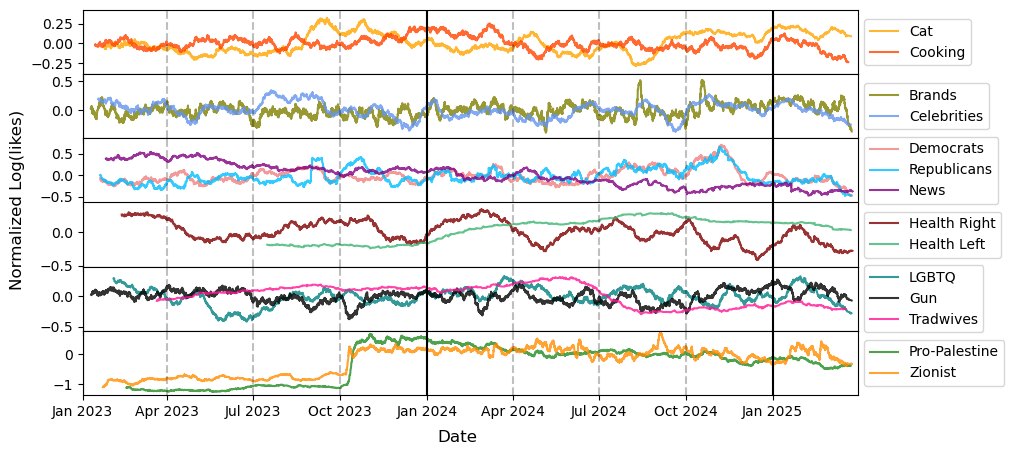

In [ ]:
fig, axes = plt.subplots(6,1, figsize=(10,5), sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)
for i,pairs in enumerate([('cat','cook'),('brands','celebrities'),('democrats','republicans','news'),('healthright','healthleft'),('queer','gun','tradwife'),('palestine','zionist')]):
  ymin, ymax = 0, 0
  for j,group in enumerate(pairs):
    df = df_bypost[df_bypost['group'] == group].copy()
    df['normalized_log_likes'] = (df['log_likes'] - df['log_likes'].mean()) / df['log_likes'].std()
    df = df.sort_values('post_times')
    df['rolling_mean'] = df['normalized_log_likes'].rolling(200).mean()

    ymin = min(ymin, df['rolling_mean'].min()) - 0.05
    ymax = max(ymax, df['rolling_mean'].max()) + 0.05
    
    axes[i].plot(df['post_times'], df['rolling_mean'], label = group_titles[group], color = group_colors[group], alpha = 0.8)
  axes[i].legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
  axes[i].set_ylim([ymin, ymax])
  axes[i].vlines(pd.date_range(start=pd.to_datetime('2022-12-01') + pd.Timedelta(days=1), end=df_bypost['post_times'].max(), freq='3M') + pd.Timedelta(days=1), ymin, ymax, linestyles='dashed', colors='black', alpha = 0.25)
  axes[i].vlines(pd.date_range(start=pd.to_datetime('2022-12-01') + pd.Timedelta(days=1), end=df_bypost['post_times'].max(), freq='1Y') + pd.Timedelta(days=1), ymin, ymax, colors='black')
axes[i].set_xlim([pd.to_datetime('2023-01-01'),pd.to_datetime('2025-04-01')])
plt.xticks(ticks=pd.date_range(start=pd.to_datetime('2022-12-01') + pd.Timedelta(days=1), end=df_bypost['post_times'].max(), freq='3M') + pd.Timedelta(days=1))
# set formatter
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

# set supx
fig.supxlabel('Date')
fig.supylabel('Normalized Log(likes)', x=0.06, y=0.5, ha='center', va='center')

plt.savefig('figs/loglikes_eda.png', dpi = 800, bbox_inches='tight')

Text(0.055, 0.5, 'Log(posts per week)')

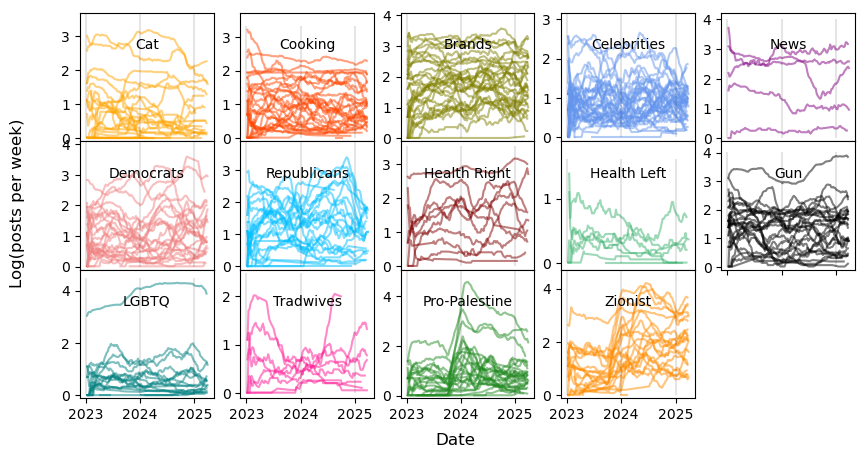

In [268]:
fig, axes = plt.subplots(3,5, figsize=(10,5), sharey = False, sharex = True)
plt.subplots_adjust(hspace=0)

for i, (ax,group) in enumerate(zip(axes.flat,group_order)):
    df = df_bypost.query('group == @group')
    df = df.groupby([pd.Grouper(key='date', freq='W'),'username']).size().reset_index(name='posts')
    df['posts'] = np.log(df['posts']+0.01)
    # df['posts_normalized'] = (df['posts'] - df['posts'].mean()) / df['posts'].std()
    df['rolling'] = df.groupby('username')['posts'].transform(lambda x: x.rolling(14, min_periods=1).mean())

    ymax = 0
    for username in df['username'].unique():
        ax.plot(df.query('username == @username')['date'], df.query('username == @username')['rolling'], label=username, color = group_colors[group], alpha = 0.5)
        ymax = max(ymax, df['rolling'].max()) 
    # ax.set_title(group_titles[group])
    ax.text(0.5, 0.75, group_titles[group], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.vlines(pd.date_range(start=pd.to_datetime('2022-12-01') + pd.Timedelta(days=1), end=df_bypost['post_times'].max(), freq='1Y') + pd.Timedelta(days=1), 0, df['posts'].max(), colors='black', alpha = 0.1)
    if ymax >= 4:
        skip = 2
    else:
        skip = 1
    ax.set_yticks(np.arange(0, ymax.__ceil__()+1, skip))
    ax.set_ylim([-0.1, ymax+0.5])
# set xticks every 6 months
plt.xticks(ticks=pd.date_range(start=pd.to_datetime('2022-12-01') + pd.Timedelta(days=1), end=df_bypost['post_times'].max(), freq='1Y') + pd.Timedelta(days=1))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))


fig.delaxes(axes[2][4])
fig.supxlabel('Date')
fig.supylabel('Log(posts per week)', x=0.055)
# fig.tight_layout()

# plt.savefig(predir+'/figs/residuals_large_feb2024.png')